In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

import seaborn as sns

In [311]:
plt.style.use("seaborn-colorblind")

In [312]:
data = pd.read_csv("C:/Users/VARUN/Desktop/AirPollution/Dataset/cpcb_dly_aq_tamil_nadu-2010.csv")

In [313]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM
0,38,1/5/2010,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,9.60,17.166667,73.333333,149.666667
1,38,1/7/2010,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.15,20.283333,61.333333,150.333333
2,38,1/12/2010,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.45,20.516667,75.000000,114.666667
3,38,19-01-10,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,10.75,18.183333,120.000000,197.666667
4,38,21-01-10,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,9.78,17.320000,96.500000,216.000000


In [314]:
dates = ['-'.join(i.split('-')[1:]) for i in data['Sampling Date']]

In [315]:
data['Sampling Date'] = dates

In [316]:
for i in range(len(data['City/Town/Village/Area'])):
    if data['City/Town/Village/Area'][i] != 'Chennai':
        data.drop(i, inplace = True)

In [317]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM
0,38,,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,9.60,17.166667,73.333333,149.666667
1,38,,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.15,20.283333,61.333333,150.333333
2,38,,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.45,20.516667,75.000000,114.666667
3,38,01-10,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,10.75,18.183333,120.000000,197.666667
4,38,01-10,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,9.78,17.320000,96.500000,216.000000


In [318]:
data = data.groupby("Sampling Date").mean().drop("SPM", axis=1)
data

,Stn Code,SO2,NO2,RSPM/PM10
Sampling Date,,,,
,110.711297,8.643460,15.260359,59.258403
01-10,109.521739,8.815797,15.602319,96.050725
02-10,112.120000,8.532667,17.179667,62.920000
03-10,107.192308,9.718590,14.965385,62.692308
04-10,107.838710,10.071505,14.791398,38.354839
05-10,112.620690,8.844943,12.957126,47.160920
06-10,102.461538,9.275385,17.729744,57.980769
07-10,101.206897,8.560920,13.778736,60.172414
08-10,104.592593,9.816667,15.298765,52.253086


<IPython.core.display.Javascript object>


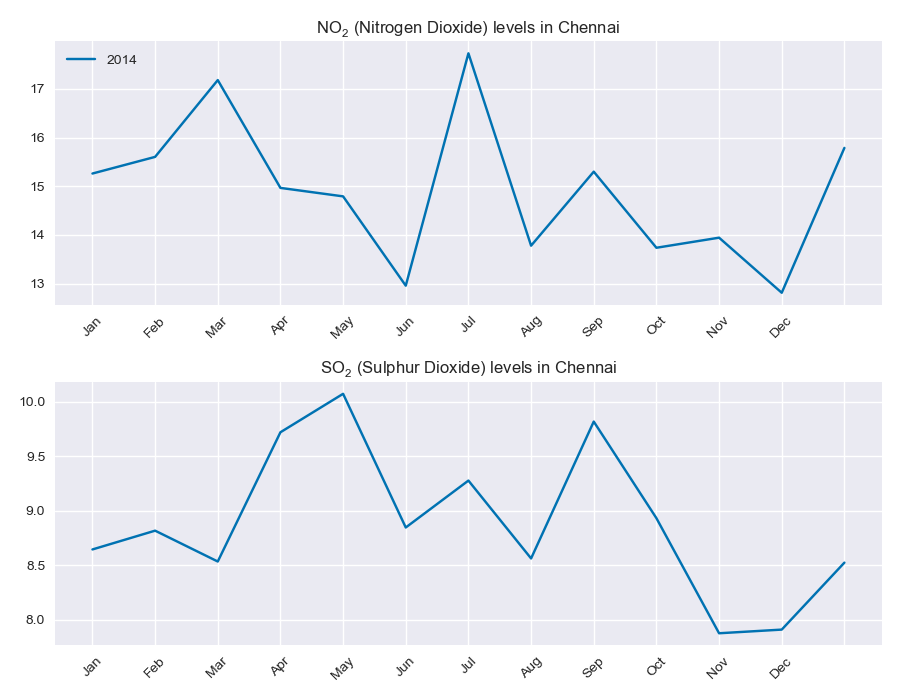

In [245]:
plt.figure(figsize=(9, 7))
plt.subplot(211)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data["NO2"]),1)
ax = plt.gca()
ax.plot(x, data["NO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend([2014],loc=2)
plt.title("$\mathregular{NO_2}$ (Nitrogen Dioxide) levels in Chennai")
ax.set_xticklabels(plotter)

plt.subplot(212)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data["SO2"]),1)
ax = plt.gca()
ax.plot(x, data["SO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.title("$\mathregular{SO_2}$ (Sulphur Dioxide) levels in Chennai")
ax.set_xticklabels(plotter)

plt.tight_layout()
#plt.show()

In [319]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [320]:
forecast_len = 3
x=np.array(data.drop(['NO2'],1))
x=x[:-forecast_len]

y=np.array(data['NO2'])
y=y[:-forecast_len]

In [321]:
sc = MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x)

x_train = []
y_train = []
for i in range(3,10):
    x_train.append(x[i-3:i,0])
    y_train.append(x[i,0])

In [322]:
x=np.array(data.drop(['NO2'],1))
x=x[:-forecast_len]

y=np.array(data['NO2'])
y=y[:-forecast_len]

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [323]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128,return_sequences=True , input_shape = (x_train.shape[1],1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(256,return_sequences=True),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.LSTM(256,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [324]:
model.compile(optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics=['accuracy'])

In [325]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 3, 128)            66560     
_________________________________________________________________
dropout_72 (Dropout)         (None, 3, 128)            0         
_________________________________________________________________
lstm_73 (LSTM)               (None, 3, 256)            394240    
_________________________________________________________________
dropout_73 (Dropout)         (None, 3, 256)            0         
_________________________________________________________________
lstm_74 (LSTM)               (None, 3, 256)            525312    
_________________________________________________________________
dropout_74 (Dropout)         (None, 3, 256)            0         
_________________________________________________________________
lstm_75 (LSTM)               (None, 64)                82176     
__________

In [326]:
history = model.fit(x_train,y_train,epochs=10,batch_size = 1)

Epoch 1/10
7/7 [==============================] - 15s 2s/step - loss: 0.2912 - acc: 0.1429
Epoch 2/10
7/7 [==============================] - 1s 164ms/step - loss: 0.1860 - acc: 0.1429
Epoch 3/10
7/7 [==============================] - 1s 160ms/step - loss: 0.1031 - acc: 0.2857
Epoch 4/10
7/7 [==============================] - 1s 184ms/step - loss: 0.1134 - acc: 0.1429
Epoch 5/10
7/7 [==============================] - 1s 160ms/step - loss: 0.1012 - acc: 0.1429
Epoch 6/10
7/7 [==============================] - 1s 152ms/step - loss: 0.1151 - acc: 0.1429
Epoch 7/10
7/7 [==============================] - 1s 152ms/step - loss: 0.1122 - acc: 0.1429
Epoch 8/10
7/7 [==============================] - 1s 152ms/step - loss: 0.1465 - acc: 0.0000e+00
Epoch 9/10
7/7 [==============================] - 1s 152ms/step - loss: 0.0882 - acc: 0.1429
Epoch 10/10
7/7 [==============================] - 1s 173ms/step - loss: 0.1236 - acc: 0.1429


In [327]:
predictions = model.predict(x_train)

<IPython.core.display.Javascript object>


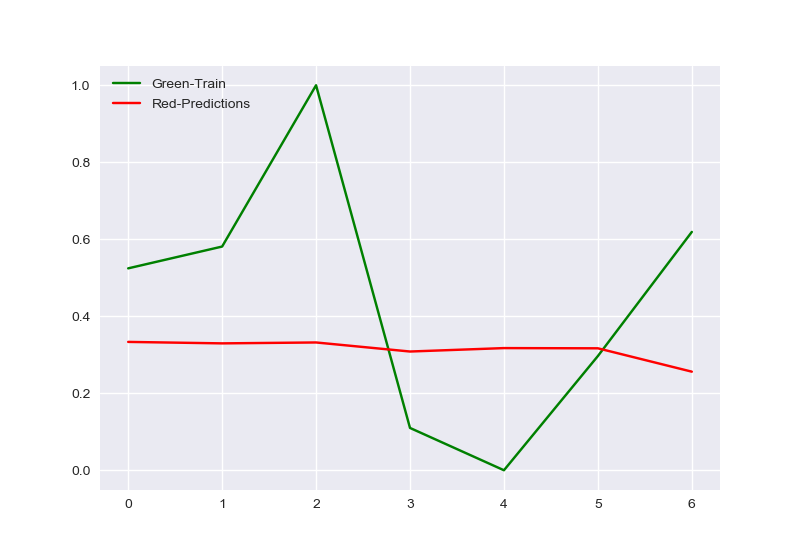

In [309]:
plt.plot(range(len(x_train)), y_train, c='g')
plt.plot(range(len(x_train)), predictions, c='r')
plt.legend(['Green-Train', 'Red-Predictions'], loc='upper left')